### Model Question:
>-  Does the sentiment of tweets containing 'bitcoin' predict bitcoin's price? 

### Statistics:
>- Null hypothesis: Positive sentiment (n=3 day average) of tweet's containing 'bitcoin' are not predictive of Bitcoin's Close price.
>- Alternative Hypothesis: Positive Sentiment (n=3 day average) of tweet's containing 'bitcoin' are predictive of Bitcoin's close price

>- Kind of test: t-test?
>- p-value: .05
>- direction of test (two tail)

##  Methodology:


##### Feature:
>-    3 day average tweet sentiment:
>-      Example: 3 day period (Ex: 01/16/2019, 01/17/2019, 01/18/2019) totals for tweets as: positive, negative and neutral.

#####  Label:
>-  Next day close price change (higher or lower):
>-    -1 if the current day's stock price is less than previous day.
>-    1 if the current day's stock price is more than previous day.


#### Machine Learning type: Classifier
###### Training data:
>- sentiment and next_day_price_change
>- Error rate:

###### Test data:
>-  sentiment
>- Error rate:

In [348]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import datetime
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 500)
from __future__ import print_function
import math
import csv
import glob

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# visualization
from IPython import display
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
#%matplotlib inline

#sentiment analysis
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords


# technical analaysis  
import talib

# machine learning
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset
tf.logging.set_verbosity(tf.logging.ERROR)
from sklearn.preprocessing import MinMaxScaler

In [2]:
# encoding='utf-8'
# encoding = "ISO-8859-1",
# error_bad_lines=False,
tweet_df = pd.read_csv('tweet-diligence/GetOldTweets-python/output_2018-11-11-to-2014-12-31-1000-perdate.csv', 
                       encoding='utf-8',
                       header=0, 
                       engine='python',
                       error_bad_lines=False,
                       usecols=[0,1,2,3,4])

Skipping line 21: ',' expected after '"'
Skipping line 70: ',' expected after '"'
Skipping line 135: ',' expected after '"'
Skipping line 161: ',' expected after '"'
Skipping line 252: ',' expected after '"'
Skipping line 265: ',' expected after '"'
Skipping line 268: ',' expected after '"'
Skipping line 348: ',' expected after '"'
Skipping line 351: ',' expected after '"'
Skipping line 371: ',' expected after '"'
Skipping line 477: ',' expected after '"'
Skipping line 624: ',' expected after '"'
Skipping line 642: ',' expected after '"'
Skipping line 658: ',' expected after '"'
Skipping line 663: ',' expected after '"'
Skipping line 668: ',' expected after '"'
Skipping line 675: ',' expected after '"'
Skipping line 733: ',' expected after '"'
Skipping line 764: ',' expected after '"'
Skipping line 770: ',' expected after '"'
Skipping line 773: ',' expected after '"'
Skipping line 774: ',' expected after '"'
Skipping line 806: ',' expected after '"'
Skipping line 812: ',' expected afte

In [359]:
csv_files = glob.glob('tweet-diligence/GetOldTweets-python/tweet-data/*.csv')
list_data = []
#encoding='ISO-8859-1',
for file in csv_files:
    data = pd.read_csv(file,
                       encoding='utf-8',
                       header=0, 
                       engine='python',
                       error_bad_lines=False,
                       usecols=[0,1,2,3])
    list_data.append(data)
    
tweet_df_all_2 = pd.concat(list_data, ignore_index = True)


Skipping line 20: ',' expected after '"'
Skipping line 98: ',' expected after '"'
Skipping line 119: ',' expected after '"'
Skipping line 130: ',' expected after '"'
Skipping line 138: ',' expected after '"'
Skipping line 173: ',' expected after '"'
Skipping line 196: ',' expected after '"'
Skipping line 222: ',' expected after '"'
Skipping line 266: ',' expected after '"'
Skipping line 273: ',' expected after '"'
Skipping line 282: ',' expected after '"'
Skipping line 284: ',' expected after '"'
Skipping line 316: ',' expected after '"'
Skipping line 323: ',' expected after '"'
Skipping line 339: ',' expected after '"'
Skipping line 347: ',' expected after '"'
Skipping line 349: ',' expected after '"'
Skipping line 366: ',' expected after '"'
Skipping line 424: ',' expected after '"'
Skipping line 434: ',' expected after '"'
Skipping line 461: ',' expected after '"'
Skipping line 512: ',' expected after '"'
Skipping line 521: ',' expected after '"'
Skipping line 531: ',' expected afte

In [360]:
tweet_df_all_2.describe()

,date,text,id,permalink
count,943334,943098,943331,943331
unique,754653,814656,769792,769868
top,2017-12-25 18:44:48,START BITCOIN MINING http://bowwellebay.blog.f...,print on art paper,https://twitter.com/Aliu_Solomon/status/100487...
freq,34,1128,6,2


In [384]:
tweet_df_all_2['permalink_stripped'] = tweet_df_all_2['permalink'].str[-18:]

In [385]:
tweet_df_all_2.describe()

,date,text,id,permalink,permalink_stripped
count,943334,943098,943331,943331,943331
unique,754653,814656,769792,769868,769795
top,2017-12-25 18:44:48,START BITCOIN MINING http://bowwellebay.blog.f...,print on art paper,https://twitter.com/Aliu_Solomon/status/100487...,026249082367614976
freq,34,1128,6,2,2


In [361]:
csv_files = glob.glob('tweet-diligence/GetOldTweets-python/semi-clean-tweet-data/*.csv')
list_data = []
#encoding='ISO-8859-1',
for file in csv_files:
    data = pd.read_csv(file,
                       encoding='utf-8',
                       header=0, 
                       engine='python',
                       error_bad_lines=False,
                       usecols=[0,1,2,3,4,5,6,7,8,9])
    list_data.append(data)
    
tweet_df_semiClean = pd.concat(list_data, ignore_index = True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [368]:
tweet_df_semiClean = tweet_df_semiClean.dropna(subset=['permalink'])
#tweet_df_semiClean.head()

In [390]:
tweet_df_semiClean['permalink_stripped'] = tweet_df_semiClean['permalink'].str[-19:]

In [391]:
tweet_df_semiClean.describe()

,date_time,id,text,permalink,permalink_stripped
count,658438,656347,658384,658439,658439
unique,28404,1160,582826,658439,658439
top,12/22/2017 10:15,9.44E+17,Jual Beli BitCoin Murah Aman Terpercaya https:...,https://twitter.com/ESNYRK/status/945021470723...,/944334256188416002
freq,342,268610,1305,1,1


In [396]:
tweet_df_semiClean = tweet_df_semiClean.rename(columns={"date_time":"date"})


In [397]:
tweet_df_combined = tweet_df_semiClean.append(tweet_df_all_2)

In [398]:
tweet_df_combined.describe()

,date,id,text,permalink,permalink_stripped
count,1601772,1599678,1601482,1601770,1601770
unique,783057,770952,1389006,1421819,1428234
top,12/22/2017 10:15,9.44E+17,Jual Beli BitCoin Murah Aman Terpercaya https:...,https://twitter.com/Burak_Balciii/status/10512...,039300040567742464
freq,342,268610,1305,2,2


In [401]:
tweet_df_combined['uid'] = tweet_df_combined['text'] + tweet_df_combined['permalink']  

In [402]:
tweet_df_combined[]

,date,id,text,permalink,permalink_stripped,uid
count,1601772,1599678,1601482,1601770,1601770,1601481
unique,783057,770952,1389006,1421819,1428234,1564706
top,12/22/2017 10:15,9.44E+17,Jual Beli BitCoin Murah Aman Terpercaya https:...,https://twitter.com/Burak_Balciii/status/10512...,039300040567742464,Ifbhttps://twitter.com/Gregarious_RSA/status/1...
freq,342,268610,1305,2,2,2


In [433]:
def trunc_at(s, d, n):
    "Returns s truncated at the n'th (3rd by default) occurrence of the delimiter, d."
    return d.join(s.split(d, n)[:n])

In [434]:
#tweet_df_combined['permalink_uid'] = tweet_df_combined['permalink'].apply(trunc_at, d="/", n=5)
tweet_df_combined['username'] = tweet_df_combined['username_status_linkid'].apply(trunc_at, d="/", n=1)


In [436]:
tweet_df_combined = tweet_df_combined.drop(['username_status_linkid', 'username_clean', 'username_cleaned'], axis=1)
tweet_df_combined.head()

,date,id,text,permalink,permalink_uid,username
0,12/25/2017 11:00,9.45E+17,#Bitcoin Is Already Bouncing Back After the Bi...,https://twitter.com/wampei/status/945323495235...,945323495235481600,wampei
1,12/25/2017 11:00,9.45E+17,bitcoin $ BTCUSD http://www. tradingview.com/c...,https://twitter.com/cryptosbuy/status/94532349...,945323493079617536,cryptosbuy
2,12/25/2017 11:00,9.45E+17,Tire suas dúvidas sobre Bitcoin http:// ow.ly/...,https://twitter.com/CDS_news/status/9453234918...,945323491817082881,CDS_news
4,12/25/2017 11:00,9.45E+17,Five Reasons #Bitcoin Will Be Your Best High-G...,https://twitter.com/SatoshiPoint/status/945323...,945323481411047426,SatoshiPoint
5,12/25/2017 11:00,9.45E+17,#الفوركس #форекс #外汇 #外匯 #Forex #تحليل_فني #فو...,https://twitter.com/CityofInvestmnt/status/945...,945323480744112129,CityofInvestmnt


In [438]:
tweet_df_combined.to_csv('btc_tweets_1418244_unique.csv')

In [437]:
tweet_df_combined.describe()

,date,id,text,permalink,permalink_uid,username
count,1601769,1599678,1601481,1601770,1601770,1601770
unique,783054,770952,1389005,1421819,1418244,321802
top,12/22/2017 10:15,9.44E+17,Jual Beli BitCoin Murah Aman Terpercaya https:...,https://twitter.com/Burak_Balciii/status/10512...,,bitcoinfirehose
freq,342,268610,1305,2,3504,9391


In [421]:
tweet_df_combined = tweet_df_combined.drop(['permalink_stripped', 'uid'], axis=1)
tweet_df_combined.describe()

,date,id,text,permalink,permalink_uid
count,1601769,1599678,1601481,1601770,1601770
unique,783054,770952,1389005,1421819,1418244
top,12/22/2017 10:15,9.44E+17,Jual Beli BitCoin Murah Aman Terpercaya https:...,https://twitter.com/Burak_Balciii/status/10512...,
freq,342,268610,1305,2,3504


In [379]:
tweet_df_semiClean = tweet_df_semiClean.drop_duplicates(subset='permalink_stripped')
#tweet_df.tail()

In [382]:
tweet_df_semiClean = tweet_df_semiClean.drop(['date', 'favorites', 'geo', 'hashtags', 'mentions', 'retweets', 'username'], axis=1)

In [383]:
tweet_df_semiClean.describe()

,date_time,id,permalink,text,permalink_stripped
count,658438,656347,658439,658384,658439
unique,28404,1160,658439,582826,658439
top,12/22/2017 10:15,9.44E+17,https://twitter.com/ESNYRK/status/945021470723...,Jual Beli BitCoin Murah Aman Terpercaya https:...,944321746722701312
freq,342,268610,1,1305,1


In [386]:
tweet_df_semiClean = tweet_df_semiClean[['date_time', 'id', 'text','permalink', 'permalink_stripped']]

In [387]:
tweet_df_semiClean.head()

,date_time,id,text,permalink,permalink_stripped
0,12/25/2017 11:00,9.45E+17,#Bitcoin Is Already Bouncing Back After the Bi...,https://twitter.com/wampei/status/945323495235...,945323495235481600
1,12/25/2017 11:00,9.45E+17,bitcoin $ BTCUSD http://www. tradingview.com/c...,https://twitter.com/cryptosbuy/status/94532349...,945323493079617536
2,12/25/2017 11:00,9.45E+17,Tire suas dúvidas sobre Bitcoin http:// ow.ly/...,https://twitter.com/CDS_news/status/9453234918...,945323491817082881
4,12/25/2017 11:00,9.45E+17,Five Reasons #Bitcoin Will Be Your Best High-G...,https://twitter.com/SatoshiPoint/status/945323...,945323481411047426
5,12/25/2017 11:00,9.45E+17,#الفوركس #форекс #外汇 #外匯 #Forex #تحليل_فني #فو...,https://twitter.com/CityofInvestmnt/status/945...,945323480744112129


In [388]:
tweet_df_all_2 = tweet_df_all_2[['date', 'id', 'text','permalink', 'permalink_stripped']]

In [389]:
tweet_df_all_2.head()

,date,id,text,permalink,permalink_stripped
0,2018-11-14 23:59:56+00:00,1062857697668853760,So you see there’s a lot of money to be made a...,https://twitter.com/Ronaldvander123/status/106...,062857697668853760
1,2018-11-14 23:59:56+00:00,1062857694682374144,bitcoin『HOLD ME』,https://twitter.com/sheucneuajxn/status/106285...,062857694682374144
2,2018-11-14 23:59:54+00:00,1062857687422132228,Bitcoin to 4K? - Finally getting the drop we b...,https://twitter.com/CryptoNvestors/status/1062...,062857687422132228
3,2018-11-14 23:59:46+00:00,1062857653376839680,"Dear crpyto nauts, yes this means digital-fiat...",https://twitter.com/submarinewalt/status/10628...,062857653376839680
4,2018-11-14 23:59:41+00:00,1062857633206538241,#bitcoin #btc #crypto video still coming tonig...,https://twitter.com/LogosResearch00/status/106...,062857633206538241


In [7]:
tweet_df = tweet_df.rename(columns={"date":"date_time"})
tweet_df.head()

,date_time,text,id,permalink
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...


In [8]:
# modify date-time column 
tweet_df["date"] = pd.to_datetime(tweet_df["date_time"]).dt.strftime('%Y-%m-%d')
tweet_df.head()

,date_time,text,id,permalink,date
0,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,2018-11-12
1,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,2018-11-12
2,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,2018-11-12
3,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,2018-11-12
4,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...,2018-11-12


In [10]:
# re-order column headers
tweet_df = tweet_df[['date', 'date_time', 'text', 'id', 'permalink']]
tweet_df.head()

,date,date_time,text,id,permalink
0,2018-11-12,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...
1,2018-11-12,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...
2,2018-11-12,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...
3,2018-11-12,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...
4,2018-11-12,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...


In [11]:
# check for NAN's in date_time
print('Total null prices: %s' % tweet_df['date_time'].isnull().sum())

Total null prices: 0


In [154]:
# select row with NAN's in Close price
tweet_df[tweet_df['date_time'].isnull()]

,date,date_time,text,id,permalink


In [35]:
# if NAN's then drop them
tweet_df = tweet_df.dropna(subset=['date_time'])

In [155]:
tweet_df.head()

,date,date_time,text,id,permalink
0,2018-11-12,2018-11-12 18:59:51,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...
1,2018-11-12,2018-11-12 18:59:50,"Okay, I'll bite. The blockchain part of Bitcoi...",1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...
2,2018-11-12,2018-11-12 18:59:49,@paulvigna Have you heard about this great new...,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...
3,2018-11-12,2018-11-12 18:59:45,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,1062132875989057537,https://twitter.com/kashifkamran200/status/106...
4,2018-11-12,2018-11-12 18:59:41,"Unable to remember his #password , man sent le...",1062132857177563137,https://twitter.com/rw227/status/1062132857177...


### Tweet Pre-processing for Sentiment Analysis

In [12]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing: stop words, links, special characters using regex.
    Args:
        tweet: DataFrame column 'text'
    Returns:
        
    '''
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = [word for word in tweet.split() if word not in stop]
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", str(tweet)).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet using textblob.
    Args:
        tweet:
    Returns:
    
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
# https://github.com/harishpuvvada/BitCoin-Value-Predictor/blob/master/Data_PreProcessing.ipynb
# https://github.com/harishpuvvada/BitCoin-Value-Predictor

# Textblob code
# from textblob import TextBlob  #passing cleaned tweets and getting a sentiment score for each tweet
# from textblob.sentiments import NaiveBayesAnalyzer
# def senti_score_udf(input_str):
#     PSanalysis = TextBlob(input_str)
#     analysis = TextBlob(input_str,analyzer=NaiveBayesAnalyzer())
#     polarity = PSanalysis.sentiment.polarity
#     subjectivity = PSanalysis.sentiment.subjectivity
#     classification = analysis.sentiment.classification
#     p_pos = analysis.sentiment.p_pos
#     p_neg = analysis.sentiment.p_neg
#     return [polarity,subjectivity,classification,p_pos,p_neg] #subjectivity, polarity, p_neg, classification
# func_udf2 = udf(senti_score_udf, ArrayType(FloatType()))
# CleanDF = CleanDF.withColumn('polarity', func_udf2(CleanDF['CleanedTweets'])[0])
# CleanDF = CleanDF.withColumn('subj', func_udf2(CleanDF['CleanedTweets'])[1])
# CleanDF = CleanDF.withColumn('class', func_udf2(CleanDF['CleanedTweets'])[2])
# CleanDF = CleanDF.withColumn('p_pos', func_udf2(CleanDF['CleanedTweets'])[3])
# CleanDF = CleanDF.withColumn('p_neg', func_udf2(CleanDF['CleanedTweets'])[4])
# CleanDF.show(3)

In [ ]:
# https://github.com/Sapphirine/Using-News-to-Predict-Stock-Movement

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def senti_score_udf(sentence):
    snt = analyser.polarity_scores(sentence)
    return ([snt['neg'], snt['neu'], snt['pos'], snt['compound']])
func_udf2 = udf(senti_score_udf, ArrayType(FloatType()))
CleanDF = CleanDF.withColumn('p_neg', func_udf2(CleanDF['CleanedTweets'])[0])
CleanDF = CleanDF.withColumn('p_neu', func_udf2(CleanDF['CleanedTweets'])[1])
CleanDF = CleanDF.withColumn('p_pos', func_udf2(CleanDF['CleanedTweets'])[2])
CleanDF = CleanDF.withColumn('p_comp', func_udf2(CleanDF['CleanedTweets'])[3])
CleanDF.show(3)

In [194]:
# download stop words
#nltk.download('stopwords')
# display stopwords
np.array(stop)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [13]:
stop = stopwords.words('english')

In [14]:
tweet_df['text_cleaned'] = tweet_df['text'].apply(clean_tweet)

In [ ]:
# https://www.kaggle.com/itratrahman/nlp-tutorial-using-python
# tf-idf
#
# https://towardsdatascience.com/sentiment-analysis-with-python-part-1-5ce197074184
# https://www.kaggle.com/ankkur13/sentiment-analysis-nlp-wordcloud-textblob

In [16]:
# re-order column headers
tweet_df = tweet_df[['date', 'date_time', 'id', 'permalink', 'text', 'text_cleaned']]
tweet_df.head()

,date,date_time,id,permalink,text,text_cleaned
0,2018-11-12,2018-11-12 18:59:51,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...
1,2018-11-12,2018-11-12 18:59:50,1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,"Okay, I'll bite. The blockchain part of Bitcoi...",okay i ll bite blockchain part bitcoin that ch...
2,2018-11-12,2018-11-12 18:59:49,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,@paulvigna Have you heard about this great new...,heard great new currency bolivar fixes bitcoin...
3,2018-11-12,2018-11-12 18:59:45,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...
4,2018-11-12,2018-11-12 18:59:41,1062132857177563137,https://twitter.com/rw227/status/1062132857177...,"Unable to remember his #password , man sent le...",unable remember password man sent letter bomb ...


In [347]:
#tweet_df['id'].count()
tweet_df['id'].nunique()


417325

## Tweet Analysis

In [17]:
# number of words in each tweet
tweet_df['tweet_len'] = tweet_df['text_cleaned'].apply(len)
tweet_df['tweet_len'].describe()

count   417327.0
mean       119.4
std         64.2
min          0.0
25%         75.0
50%        106.0
75%        158.0
max       1576.0
Name: tweet_len, dtype: float64

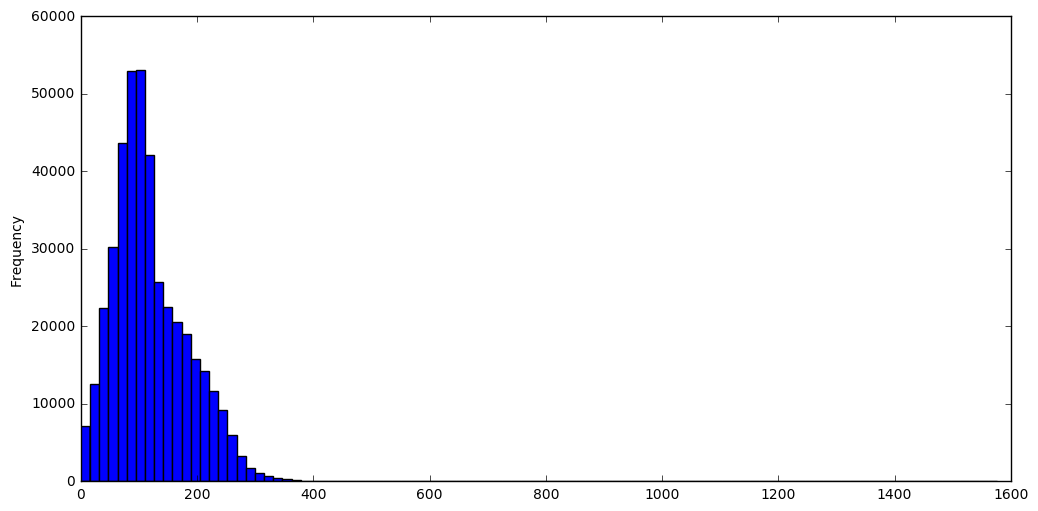

In [18]:
tweet_df['tweet_len'].plot(kind='hist', bins=100, figsize=(12,6))

In [221]:
#tweet_df[tweet_df['tweet_len'] > 179]['text_cleaned']
tweet_df[tweet_df['tweet_len'] > 300]['text_cleaned']
# view entire tweet
#tweet_df[tweet_df['tweet_len'] > 179]['text_cleaned'].iloc[0]

21        principales firmas petroleras bancos se asocia...
70        u s citizen joseph kim phoenix arizona fined 1...
218       twitter grapples fake elon musk accounts promo...
336       lo que viene para bitcoin puede ser algo realm...
594       rt twitter grapples fake elon musk accounts pr...
624       ai aspiration gap hook ai actual business resu...
704       countries around world embracing digital disru...
784       xrp blockchain consensus xrp xrpthestandard dl...
812       eos reverses previously confirmed transactions...
855       el principal administrador de revolut asegura ...
864       starinvestigation nameless faceless hacker ext...
874       starinvestigation nameless faceless hacker ext...
889       empresa criptobancaria suiza espera recibir li...
1139      krypto nachrichten kommendes ethereum upgrade ...
1156      ethereum eth kaleido partners amazon launch et...
1235      straight crackpot s mouth bitcoin cal3 draper ...
1404      private blockchains could comp

In [ ]:
#tweet_df['tweet_len'].plot(kind='scatter', x='')

### Sentiment Analysis

In [19]:
tweet_df['sentiment'] = tweet_df['text_cleaned'].apply(analyze_sentiment)

In [224]:
tweet_df = tweet_df[['date', 'date_time', 'id', 'permalink', 'text', 'text_cleaned', 'sentiment']]

In [117]:
tweet_df.head()

,date,date_time,id,permalink,text,text_cleaned,tweet_len,sentiment
0,2018-11-12,2018-11-12 18:59:51,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...,173,-1
1,2018-11-12,2018-11-12 18:59:50,1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,"Okay, I'll bite. The blockchain part of Bitcoi...",okay i ll bite blockchain part bitcoin that ch...,183,1
2,2018-11-12,2018-11-12 18:59:49,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,@paulvigna Have you heard about this great new...,heard great new currency bolivar fixes bitcoin...,157,1
3,2018-11-12,2018-11-12 18:59:45,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...,152,-1
4,2018-11-12,2018-11-12 18:59:41,1062132857177563137,https://twitter.com/rw227/status/1062132857177...,"Unable to remember his #password , man sent le...",unable remember password man sent letter bomb ...,151,-1


In [131]:
tweet_df.describe()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet
count,417327.0,417327.0,417327.0
mean,0.2,0.3,0.1
std,0.6,0.5,0.3
min,-1.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,1.0,1.0,0.0
max,1.0,1.0,1.0


In [132]:

#  
tweet_df["pos_sentiment_tweet"] = np.where(tweet_df["sentiment"] > 0, 1, 0)
#tweet_df["neg_sentiment_tweet"] = np.where(tweet_df["sentiment"] < 0, 1, tweet_df["pos_sentiment_tweet"])
tweet_df["neutral_sentiment_tweet"] = np.where(tweet_df["sentiment"] == 0, 1, 0)
tweet_df["neg_sentiment_tweet"] = np.where(tweet_df["sentiment"] < 0, 1, 0)
tweet_df.head()

,date,date_time,id,permalink,text,text_cleaned,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
0,2018-11-12,2018-11-12 18:59:51,1062132900940992513,https://twitter.com/freebitcoindir/status/1062...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0,1,0
1,2018-11-12,2018-11-12 18:59:50,1062132895723257861,https://twitter.com/jmcorgan/status/1062132895...,"Okay, I'll bite. The blockchain part of Bitcoi...",okay i ll bite blockchain part bitcoin that ch...,1,1,0,0
2,2018-11-12,2018-11-12 18:59:49,1062132890207629312,https://twitter.com/Grinnersaok/status/1062132...,@paulvigna Have you heard about this great new...,heard great new currency bolivar fixes bitcoin...,1,1,0,0
3,2018-11-12,2018-11-12 18:59:45,1062132875989057537,https://twitter.com/kashifkamran200/status/106...,Greg Maxwell: Bitcoin SV ‘Maybe’ the ‘Real Fak...,greg maxwell bitcoin sv maybe real fake bitcoi...,-1,0,1,0
4,2018-11-12,2018-11-12 18:59:41,1062132857177563137,https://twitter.com/rw227/status/1062132857177...,"Unable to remember his #password , man sent le...",unable remember password man sent letter bomb ...,-1,0,1,0


In [122]:
tweet_df = tweet_df.drop(columns=['tweet_len'])

In [138]:
tweet_df.describe()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
count,417327.0,417327.0,417327.0,417327.0
mean,0.2,0.3,0.1,0.6
std,0.6,0.5,0.3,0.5
min,-1.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,1.0
75%,1.0,1.0,0.0,1.0
max,1.0,1.0,1.0,1.0


In [133]:
tweet_df_sumd = tweet_df.groupby(pd.Grouper(key='date', sort=True)).sum()

In [134]:
tweet_df_sumd.head()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
date,,,,
2014-12-02,17,20,3,11
2014-12-06,6,7,1,9
2014-12-08,5,29,24,38
2014-12-10,29,31,2,23
2014-12-13,6,7,1,10


In [139]:
tweet_df_sumd_3day = tweet_df_sumd.rolling(window=3).sum()
tweet_df_sumd_3day.head()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
date,,,,
2014-12-02,nan,nan,nan,nan
2014-12-06,nan,nan,nan,nan
2014-12-08,28.0,56.0,28.0,58.0
2014-12-10,40.0,67.0,27.0,70.0
2014-12-13,40.0,67.0,27.0,71.0


In [140]:
tweet_df_sumd_3day.reset_index(level=0, inplace=True)
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
0,2014-12-02,nan,nan,nan,nan
1,2014-12-06,nan,nan,nan,nan
2,2014-12-08,28.0,56.0,28.0,58.0
3,2014-12-10,40.0,67.0,27.0,70.0
4,2014-12-13,40.0,67.0,27.0,71.0


In [141]:
# if NAN's then drop them
tweet_df_sumd_3day = tweet_df_sumd_3day.dropna(subset=['sentiment', 'pos_sentiment_tweet','pos_sentiment_tweet'])
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet
2,2014-12-08,28.0,56.0,28.0,58.0
3,2014-12-10,40.0,67.0,27.0,70.0
4,2014-12-13,40.0,67.0,27.0,71.0
5,2014-12-17,38.0,42.0,4.0,44.0
6,2014-12-18,28.0,31.0,3.0,44.0


In [144]:
tweet_df_sumd_3day['pos-neg'] = tweet_df_sumd_3day['pos_sentiment_tweet'] - tweet_df_sumd_3day['neg_sentiment_tweet']
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,diff,pos-neg
2,2014-12-08,28.0,56.0,28.0,58.0,28.0,28.0
3,2014-12-10,40.0,67.0,27.0,70.0,40.0,40.0
4,2014-12-13,40.0,67.0,27.0,71.0,40.0,40.0
5,2014-12-17,38.0,42.0,4.0,44.0,38.0,38.0
6,2014-12-18,28.0,31.0,3.0,44.0,28.0,28.0


In [146]:
tweet_df_sumd_3day = tweet_df_sumd_3day.drop(columns=['diff'])

In [ ]:
tweet_df_sumd_3day['pos-neg'] = tweet_df_sumd_3day['pos_sentiment_tweet'] - tweet_df_sumd_3day['neg_sentiment_tweet']
tweet_df_sumd_3day.head()

In [148]:
tweet_df_sumd_3day.describe()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg
count,1030.0,1030.0,1030.0,1030.0,1030.0
mean,279.5,398.6,119.1,694.9,279.5
std,301.6,430.8,136.2,747.4,301.6
min,3.0,14.0,0.0,18.0,3.0
25%,34.0,43.0,8.0,69.2,34.0
50%,68.0,84.5,24.0,160.0,68.0
75%,609.0,907.8,264.0,1604.0,609.0
max,977.0,1220.0,492.0,1856.0,977.0


In [149]:
tweet_df_sumd_3day['neg-plus-neutral'] = tweet_df_sumd_3day['neutral_sentiment_tweet'] + tweet_df_sumd_3day['neg_sentiment_tweet']
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral
2,2014-12-08,28.0,56.0,28.0,58.0,28.0,86.0
3,2014-12-10,40.0,67.0,27.0,70.0,40.0,97.0
4,2014-12-13,40.0,67.0,27.0,71.0,40.0,98.0
5,2014-12-17,38.0,42.0,4.0,44.0,38.0,48.0
6,2014-12-18,28.0,31.0,3.0,44.0,28.0,47.0


In [150]:
tweet_df_sumd_3day.describe()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral
count,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0
mean,279.5,398.6,119.1,694.9,279.5,814.0
std,301.6,430.8,136.2,747.4,301.6,879.3
min,3.0,14.0,0.0,18.0,3.0,21.0
25%,34.0,43.0,8.0,69.2,34.0,78.0
50%,68.0,84.5,24.0,160.0,68.0,183.0
75%,609.0,907.8,264.0,1604.0,609.0,1902.8
max,977.0,1220.0,492.0,1856.0,977.0,2100.0


In [151]:
tweet_df_sumd_3day['pos-neg-plusNeutral'] = tweet_df_sumd_3day['pos_sentiment_tweet'] - tweet_df_sumd_3day['neg-plus-neutral']
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral
2,2014-12-08,28.0,56.0,28.0,58.0,28.0,86.0,-30.0
3,2014-12-10,40.0,67.0,27.0,70.0,40.0,97.0,-30.0
4,2014-12-13,40.0,67.0,27.0,71.0,40.0,98.0,-31.0
5,2014-12-17,38.0,42.0,4.0,44.0,38.0,48.0,-6.0
6,2014-12-18,28.0,31.0,3.0,44.0,28.0,47.0,-16.0


In [152]:
tweet_df_sumd_3day.describe()

,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral
count,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0,1030.0
mean,279.5,398.6,119.1,694.9,279.5,814.0,-415.4
std,301.6,430.8,136.2,747.4,301.6,879.3,459.6
min,3.0,14.0,0.0,18.0,3.0,21.0,-1288.0
25%,34.0,43.0,8.0,69.2,34.0,78.0,-930.8
50%,68.0,84.5,24.0,160.0,68.0,183.0,-102.5
75%,609.0,907.8,264.0,1604.0,609.0,1902.8,-33.2
max,977.0,1220.0,492.0,1856.0,977.0,2100.0,35.0


In [153]:
# 1's for bullish regimes, and 0's for everything else
tweet_df_sumd_3day["signal"] = np.where(tweet_df_sumd_3day["pos-neg-plusNeutral"] > 0, 1, 0)

tweet_df_sumd_3day["signal"] = np.where(tweet_df_sumd_3day["pos-neg-plusNeutral"] < 0, -1, tweet_df_sumd_3day["signal"] )

In [154]:
tweet_df_sumd_3day.head()

,date,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral,signal
2,2014-12-08,28.0,56.0,28.0,58.0,28.0,86.0,-30.0,-1
3,2014-12-10,40.0,67.0,27.0,70.0,40.0,97.0,-30.0,-1
4,2014-12-13,40.0,67.0,27.0,71.0,40.0,98.0,-31.0,-1
5,2014-12-17,38.0,42.0,4.0,44.0,38.0,48.0,-6.0,-1
6,2014-12-18,28.0,31.0,3.0,44.0,28.0,47.0,-16.0,-1


In [156]:
tweet_df_sumd_3day['signal'].value_counts() 

-1    992
 1     36
 0      2
Name: signal, dtype: int64

#### Bitcoin Price Data (12-01-2014 to 11-11-2018)

In [157]:
def dateparse(time_in_days):
    return datetime.datetime.fromtimestamp(float(time_in_days))

# fix random seed for reproducibility
np.random.seed(20)

price_df = pd.read_csv('price_data/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', 
                   parse_dates=True, 
                   date_parser=dateparse, 
                   index_col=[0])

In [158]:
price_df.reset_index(level=0, inplace=True)

In [159]:
price_df = price_df.drop(["Open", "High", "Low", "Volume_(BTC)", "Volume_(Currency)", "Weighted_Price"], axis=1)

In [160]:
price_df["date"] = pd.to_datetime(price_df["Timestamp"]).dt.strftime('%Y-%m-%d')
# group by date
price_df = price_df.groupby(pd.Grouper(key='date', sort=True)).mean()

In [202]:
price_df['log_close'] = np.log(price_df['Close'])

In [203]:
# check for NAN's in Close price
print('Total null close prices: %s' % price_df['Close'].isnull().sum())


Total null close prices: 0


In [162]:
# select row with NAN's in Close price
price_df[price_df['Close'].isnull()]
#drop all rows that have any NaN values
price_df = price_df.dropna() 

In [204]:
# check for NAN's in Close price
print('Total null close prices: %s' % price_df['Close'].isnull().sum())

Total null close prices: 0


In [205]:
price_df.describe()

,Close,1day_price_change,regime,log_close
count,1407.0,1407.0,1407.0,1407.0
mean,3052.6,4.3,0.1,7.1
std,3819.7,228.5,1.0,1.4
min,156.9,-2067.0,-1.0,5.1
25%,385.1,-6.8,-1.0,6.0
50%,769.3,0.8,1.0,6.6
75%,6295.3,15.3,1.0,8.7
max,19419.9,2926.3,1.0,9.9


In [206]:
price_df.head()

,date,Close,1day_price_change,regime,log_close
1,2014-12-02,377.9,42.9,1,5.9
2,2014-12-03,377.7,-0.1,-1,5.9
3,2014-12-05,378.0,0.3,1,5.9
4,2014-12-08,375.0,-3.0,-1,5.9
5,2014-12-09,379.2,4.2,1,5.9


In [207]:
price_df.reset_index(level=0, inplace=True)

In [208]:
#type(price_df['date'])
dates_list = list(price_df['date'])
#dates_list[0:10]
#type(price_df['date'][0])
dates_list_formatted = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list]

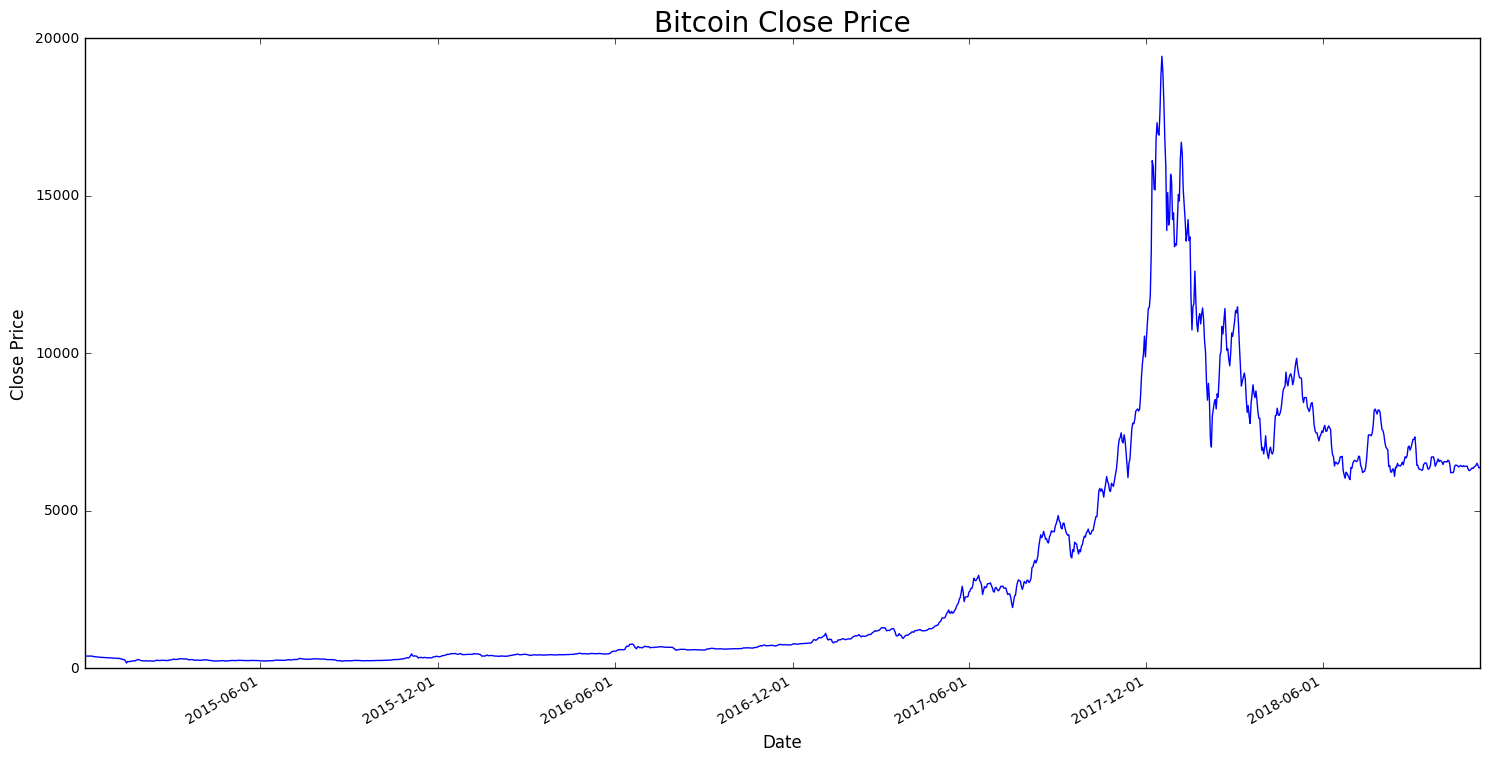

In [209]:
#preproces date col
#type(price_df['date'])
dates_list = list(price_df['date'])
#dates_list[0:10]
#type(price_df['date'][0])
dates_list_formatted = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list]


# price visualization
plt.figure(figsize = (18,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=0))

plt.plot(dates_list_formatted, price_df['Close'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('Close Price',fontsize=12)
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Close Price',fontsize=20)

In [169]:
price_df['1day_price_change'] = price_df['Close'].diff()

In [170]:
price_df.head()

,date,Close,1day_price_change
0,2014-12-01,335.0,nan
1,2014-12-02,377.9,42.9
2,2014-12-03,377.7,-0.1
3,2014-12-05,378.0,0.3
4,2014-12-08,375.0,-3.0


In [171]:
#drop all rows that have any NaN values
price_df = price_df.dropna() 
price_df.head()

,date,Close,1day_price_change
1,2014-12-02,377.9,42.9
2,2014-12-03,377.7,-0.1
3,2014-12-05,378.0,0.3
4,2014-12-08,375.0,-3.0
5,2014-12-09,379.2,4.2


In [172]:
# 1's for bullish regimes, and 0's for everything else
price_df["regime"] = np.where(price_df["1day_price_change"] > 0, 1, 0)

price_df["regime"] = np.where(price_df["1day_price_change"] < 0, -1, price_df["regime"])

In [173]:
price_df.head(15)

,date,Close,1day_price_change,regime
1,2014-12-02,377.9,42.9,1
2,2014-12-03,377.7,-0.1,-1
3,2014-12-05,378.0,0.3,1
4,2014-12-08,375.0,-3.0,-1
5,2014-12-09,379.2,4.2,1
6,2014-12-11,363.5,-15.8,-1
7,2014-12-18,340.0,-23.5,-1
8,2015-01-07,301.6,-38.4,-1
9,2015-01-08,288.0,-13.6,-1
10,2015-01-12,260.0,-28.0,-1


#### Merge - BTC Price and Blockchain Transaction Data

In [210]:
price_tweet_df = (price_df.merge(tweet_df_sumd_3day, on='date'))

In [211]:
price_tweet_df.head()

,index,date,Close,1day_price_change,regime,log_close,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral,signal
0,4,2014-12-08,375.0,-3.0,-1,5.9,28.0,56.0,28.0,58.0,28.0,86.0,-30.0,-1
1,7,2014-12-18,340.0,-23.5,-1,5.8,28.0,31.0,3.0,44.0,28.0,47.0,-16.0,-1
2,10,2015-01-12,260.0,-28.0,-1,5.6,26.0,34.0,8.0,77.0,26.0,85.0,-51.0,-1
3,13,2015-01-15,207.6,50.8,1,5.3,30.0,40.0,10.0,68.0,30.0,78.0,-38.0,-1
4,14,2015-01-16,203.0,-4.6,-1,5.3,9.0,20.0,11.0,45.0,9.0,56.0,-36.0,-1


In [ ]:
# change column order
price_tweet_df = price_tweet_df[['date', 
                                 'Close', 
                                 '1day_price_change',
                                 'previous_day_price_change_direction', 
                                 'sentiment']]

In [212]:
price_tweet_model = ols("""sentiment ~ Close""", data=price_tweet_df).fit()

price_tweet_model_summary = price_tweet_model.summary()
price_tweet_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2756.
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          6.49e-291
Time:                        18:23:30   Log-Likelihood:                -6549.6
No. Observations:                1012   AIC:                         1.310e+04
Df Residuals:                    1010   BIC:                         1.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.3266      6.883      4.406      0.000      16.820      43.833
Close          0.0630      0.001     52.501      0.000       0.061       0.065
==============================================================================
Omnibus:                       58.966   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.272
Skew:                           0.010   Prob(JB):                     7.34e-50
Kurtosis:                       5.316   Cond. No.                     8.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [213]:
price_tweet_model = ols("""sentiment ~ log_close""", data=price_tweet_df).fit()

price_tweet_model_summary = price_tweet_model.summary()
price_tweet_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2564.
Date:                Wed, 23 Jan 2019   Prob (F-statistic):          2.03e-279
Time:                        18:23:50   Log-Likelihood:                -6576.1
No. Observations:                1012   AIC:                         1.316e+04
Df Residuals:                    1010   BIC:                         1.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1111.4285     27.994    -39.702      0.000   -1166.362   -1056.495
log_close    185.0506      3.654     50.637      0.000     177.879     192.222
==============================================================================
Omnibus:                       27.017   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.745
Skew:                          -0.408   Prob(JB):                     5.73e-07
Kurtosis:                       2.875   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
price_tweet_model_posTweets = ols("""pos_sentiment_tweet ~ Close""", data=price_tweet_df).fit()

price_tweet_model_posTweets = price_tweet_model_posTweets.summary()
price_tweet_model_posTweets

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     pos_sentiment_tweet   R-squared:                       0.762
Model:                             OLS   Adj. R-squared:                  0.762
Method:                  Least Squares   F-statistic:                     3234.
Date:                 Wed, 23 Jan 2019   Prob (F-statistic):          3.88e-317
Time:                         18:24:08   Log-Likelihood:                -6849.4
No. Observations:                 1012   AIC:                         1.370e+04
Df Residuals:                     1010   BIC:                         1.371e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3709      9.256      3.821      0.000      17.207      53.535
Close          0.0918      0.002     56.873      0.000       0.089       0.095
==============================================================================
Omnibus:                       55.080   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.615
Skew:                          -0.211   Prob(JB):                     1.33e-35
Kurtosis:                       4.906   Cond. No.                     8.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Build the model

### Define Features and Target Columns

In [255]:
price_tweet_df

,index,date,Close,1day_price_change,regime,log_close,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral,signal
0,4,2014-12-08,375.0,-3.0,-1,5.9,28.0,56.0,28.0,58.0,28.0,86.0,-30.0,-1
1,7,2014-12-18,340.0,-23.5,-1,5.8,28.0,31.0,3.0,44.0,28.0,47.0,-16.0,-1
2,10,2015-01-12,260.0,-28.0,-1,5.6,26.0,34.0,8.0,77.0,26.0,85.0,-51.0,-1
3,13,2015-01-15,207.6,50.8,1,5.3,30.0,40.0,10.0,68.0,30.0,78.0,-38.0,-1
4,14,2015-01-16,203.0,-4.6,-1,5.3,9.0,20.0,11.0,45.0,9.0,56.0,-36.0,-1
5,15,2015-01-17,199.8,-3.3,-1,5.3,10.0,20.0,10.0,47.0,10.0,57.0,-37.0,-1
6,17,2015-01-20,217.7,2.5,1,5.4,23.0,30.0,7.0,40.0,23.0,47.0,-17.0,-1
7,20,2015-01-23,225.7,-7.3,-1,5.4,37.0,42.0,5.0,50.0,37.0,55.0,-13.0,-1
8,21,2015-01-24,248.6,22.9,1,5.5,31.0,35.0,4.0,55.0,31.0,59.0,-24.0,-1
9,24,2015-01-27,260.6,-9.2,-1,5.6,25.0,30.0,5.0,41.0,25.0,46.0,-16.0,-1


In [216]:
# Define the input feature: sentiment
###  Train/Test Split
training_features = price_tweet_df[["pos_sentiment_tweet"]].head(800)
training_targets = price_tweet_df["log_close"].head(800)

test_features = price_tweet_df[["pos_sentiment_tweet"]].tail(212)
test_targets = price_tweet_df["log_close"].tail(212)
                              
# Configure a numeric feature column for sentiment
feature_columns = [tf.feature_column.numeric_column("pos_sentiment_tweet")]

## Configure the LinearRegressor

In [217]:
# Use gradient descent as the optimizer for training the model.
# learning_rate - controls size of the gradient step
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

### Define Input Function

In [218]:
def my_input_fn(features, targets, batch_size=1, shuffle=False, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(buffer_size=10000)
            
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [219]:
### Train the Model
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(training_features, training_targets),
    steps=100
)

In [199]:
### Evaluate the Model on Training Data

# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn = lambda: my_input_fn(training_features, training_targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, training_targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 27986139.258
Root Mean Squared Error (on training data): 5290.193


In [240]:
### Evaluate the Model on Training Data

# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn = lambda: my_input_fn(training_features, training_targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions_raw = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions_raw])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, training_targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 53.189
Root Mean Squared Error (on training data): 7.293


In [200]:
min_close_price = price_tweet_df["Close"].min()
max_close_price = price_tweet_df["Close"].max()
min_max_difference = max_close_price - min_close_price

print("Min. Close Price: %0.3f" % min_close_price)
print("Max. Close Price: %0.3f" % max_close_price)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Close Price: 199.750
Max. Close Price: 19419.864
Difference between Min. and Max.: 19220.114
Root Mean Squared Error: 5290.193


In [229]:
min_log_close_price = price_tweet_df["log_close"].min()
max_log_close_price = price_tweet_df["log_close"].max()
min_max_difference = max_log_close_price - min_log_close_price

print("Min. log_close Price: %0.3f" % min_log_close_price)
print("Max. log_close Price: %0.3f" % max_log_close_price)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. log_close Price: 5.297
Max. log_close Price: 9.874
Difference between Min. and Max.: 4.577
Root Mean Squared Error: 7.293


In [256]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(training_targets)
calibration_data.describe()

,predictions,targets
count,800.0,800.0
mean,0.0,7.2
std,0.0,1.4
min,0.0,5.3
25%,0.0,6.0
50%,0.0,6.8
75%,0.0,8.4
max,0.1,9.9


In [231]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(training_targets)
calibration_data.describe()

,predictions,targets
count,800.0,800.0
mean,0.0,7.2
std,0.0,1.4
min,0.0,5.3
25%,0.0,6.0
50%,0.0,6.8
75%,0.0,8.4
max,0.1,9.9


In [225]:
sample = price_tweet_df.sample(n=300)

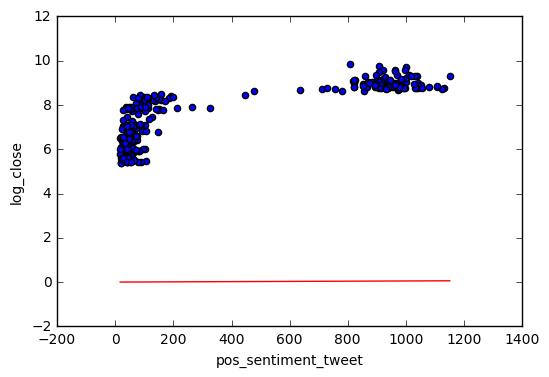

In [226]:
# Get the min and max pos_sentiment_tweet values.
x_0 = sample["pos_sentiment_tweet"].min()
x_1 = sample["pos_sentiment_tweet"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/pos_sentiment_tweet/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted log_close for the min and max pos_sentiment_tweet values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("log_close")
plt.xlabel("pos_sentiment_tweet")

# Plot a scatter plot from our data sample.
plt.scatter(sample["pos_sentiment_tweet"], sample["log_close"])

# Display graph.
plt.show()

##  Evaluate Model on Test Data

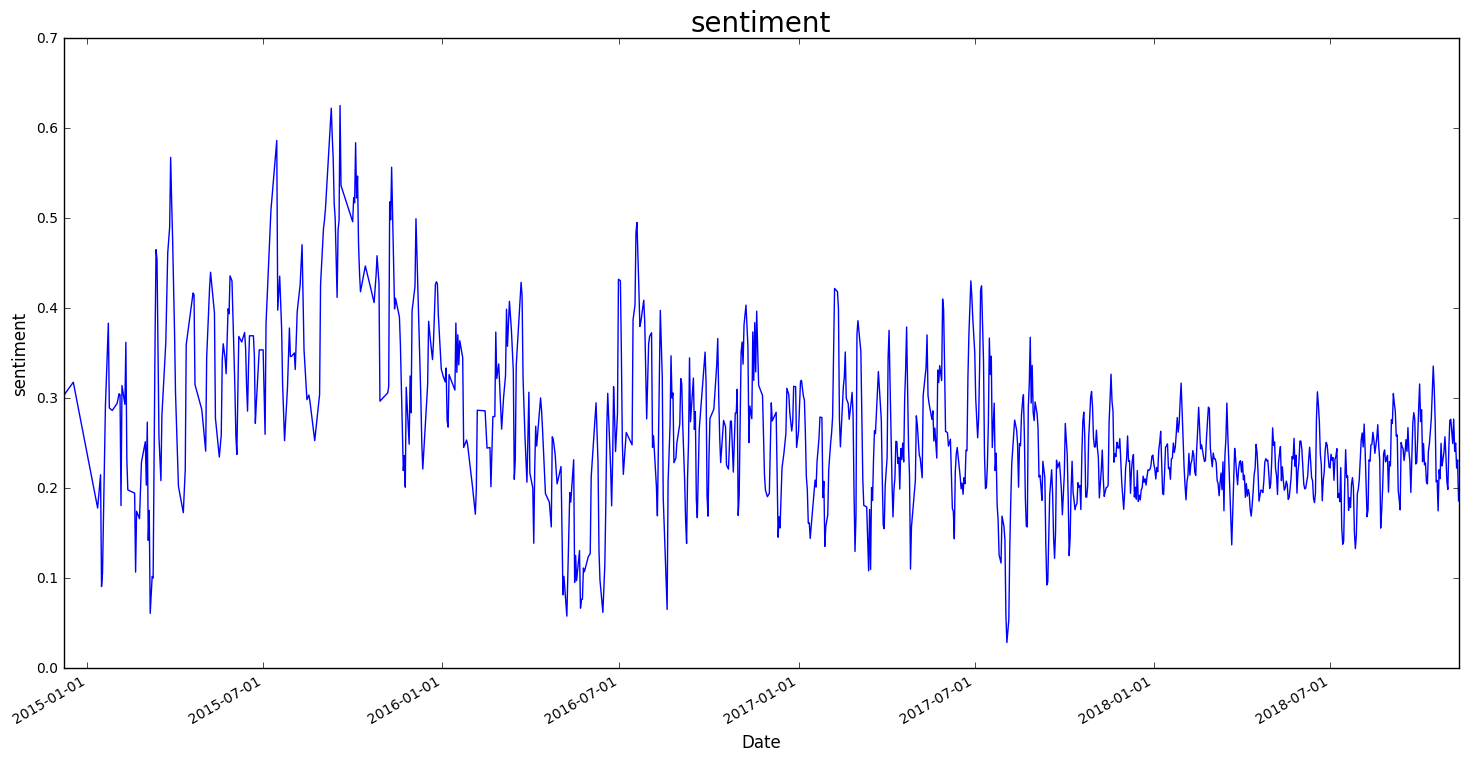

In [116]:
# Sentiment visualization
plt.figure(figsize = (18,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=0))

plt.plot(dates_list_formatted, price_tweet_df['sentiment'])
plt.xlabel('Date',fontsize=12)
plt.ylabel('sentiment',fontsize=12)
plt.gcf().autofmt_xdate()
plt.title('sentiment',fontsize=20)

In [257]:
price_tweet_df_training = price_tweet_df[:800]
price_tweet_df_test = price_tweet_df[800:]

In [333]:
price_tweet_df_test = price_tweet_df[800:]

In [335]:
def preprocess_features(price_tweet_df):
    """Prepares input features from price_tweet_dfdata set.

  Args:
    price_tweet_df: A Pandas DataFrame expected to contain feature data
  Returns:
    A DataFrame that contains the features to be used for the model.
  """
    selected_features = price_tweet_df[["pos_sentiment_tweet"]]
    processed_features = selected_features.copy()
    
    return processed_features

def preprocess_targets(price_tweet_df):
    """Prepares target features (i.e., labels) from price_tweet_df data set.

  Args:
    price_tweet_df: A Pandas DataFrame expected to contain target data
     
  Returns:
    A DataFrame that contains the target feature.
  """
    output_targets = pd.DataFrame()
    output_targets["Close"] = price_tweet_df["Close"]
    
    return output_targets

In [340]:
def train_model(learning_rate, steps, batch_size, input_feature="pos_sentiment_tweet"):
    """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `price_tweet_df`
      to use as input feature.
  """
    periods = 10
    steps_per_period = steps / periods
    
    my_feature = input_feature
    my_feature_data = price_tweet_df_training[[my_feature]]
    my_label = "Close"
    targets = price_tweet_df_training[my_label]
    
    # Create feature columns.
    feature_columns = [tf.feature_column.numeric_column(my_feature)]
    
    # Create input functions.
    training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
    prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
    
    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )
    # Set up to plot the state of our model's line each period.
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.title("Learned Line by Period")
    plt.ylabel(my_label)
    plt.xlabel(my_feature)
    sample = price_tweet_df.sample(n=300)
    plt.scatter(sample[my_feature], sample[my_label])
    colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]
    
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    root_mean_squared_errors = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
        )
        
        # Take a break and compute predictions.
        predictions = linear_regressor.predict(input_fn=prediction_input_fn)
        predictions = np.array([item['predictions'][0] for item in predictions])
        
        # Compute loss.
        root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))
        
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        root_mean_squared_errors.append(root_mean_squared_error)
        
        # Finally, track the weights and biases over time.
        # Apply some math to ensure that the data and line are plotted neatly.
        y_extents = np.array([0, sample[my_label].max()])
        
        weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
        bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')
        
        x_extents = (y_extents - bias) / weight
        x_extents = np.maximum(np.minimum(x_extents,
                                  sample[my_feature].max()),
                           sample[my_feature].min())
        
        y_extents = weight * x_extents + bias
        plt.plot(x_extents, y_extents, color=colors[period]) 
    
    print("Model training finished.")
    
    # Output a graph of loss metrics over periods.
    plt.subplot(1, 2, 2)
    plt.ylabel('RMSE')
    plt.xlabel('Periods')
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(root_mean_squared_errors)
    
    # Output a table with calibration data.
    calibration_data_final = pd.DataFrame()
    calibration_data_final["predictions"] = pd.Series(predictions)
    calibration_data_final["targets"] = pd.Series(targets)
    display.display(calibration_data_final.describe())
    
    #preproces date col
    dates_list_actual = list(price_tweet_df['date'])
    dates_list_formatted_actual = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_actual]

    dates_list_training = list(price_tweet_df_training['date'])
    dates_list_formatted_training = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_training]

    #dates_list_test = list(price_tweet_df['date'].tail(212))
    #dates_list_formatted_test = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_test]

    # price visualization
    plt.figure(figsize = (18,9))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=0))

    plt.plot(dates_list_formatted_actual, price_tweet_df['Close'], color='b', label='Actual')
    plt.plot(dates_list_formatted_training, predictions, color='red', label='Training')
    #plt.plot(dates_list_formatted_test, test_predictions, color='red', label='Test-Predicted')

    plt.xlabel('Date',fontsize=12)
    plt.ylabel('Close',fontsize=12)
    plt.gcf().autofmt_xdate()
    plt.title('Bitcoin Close Price',fontsize=20)
    plt.ylim(-1,20000)
    plt.legend()
    
    print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
    
    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 1872.74
  period 01 : 1871.20
  period 02 : 1869.60
  period 03 : 1868.01
  period 04 : 1866.46
  period 05 : 1864.94
  period 06 : 1863.47
  period 07 : 1862.04
  period 08 : 1860.66
  period 09 : 1859.31
Model training finished.


,predictions,targets
count,800.0,800.0
mean,3044.0,3185.6
std,4291.7,4226.2
min,174.6,199.8
25%,480.3,422.6
50%,733.2,916.4
75%,2032.5,4359.6
max,13568.0,19419.9


Final RMSE (on training data): 1859.31


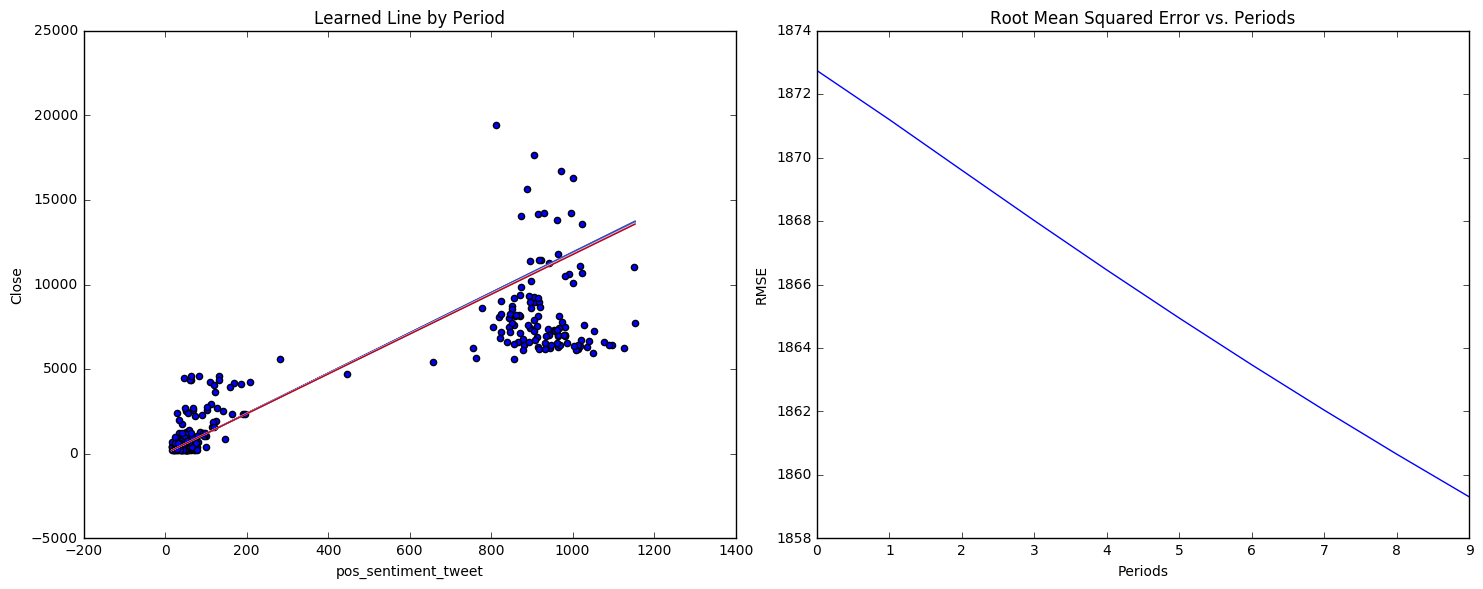

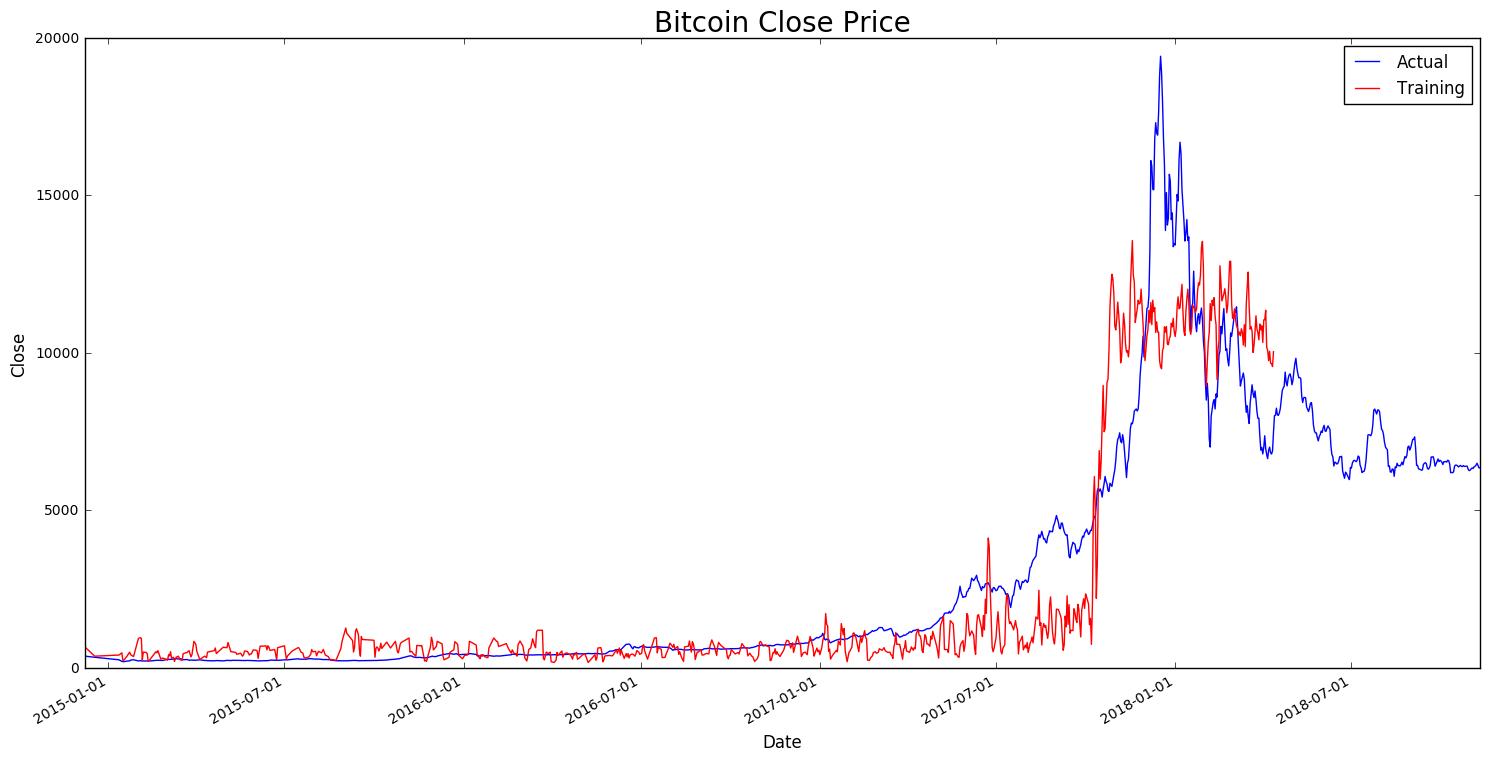

In [341]:
linear_regressor = train_model(
    learning_rate=0.2,
    steps=500,
    batch_size=5)

In [342]:
price_tweet_df_test = price_tweet_df[800:]

test_examples = preprocess_features(price_tweet_df_test)
test_targets = preprocess_targets(price_tweet_df_test)

predict_test_input_fn = lambda: my_input_fn(
    test_examples, 
    test_targets['Close'], 
    num_epochs=1, 
    shuffle=False)

test_predictions = linear_regressor.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['predictions'][0] for item in test_predictions])

root_mean_squared_error = math.sqrt(metrics.mean_squared_error(test_predictions, test_targets))
print("Final RMSE (on test data): %0.2f" % root_mean_squared_error)

Final RMSE (on test data): 4395.36


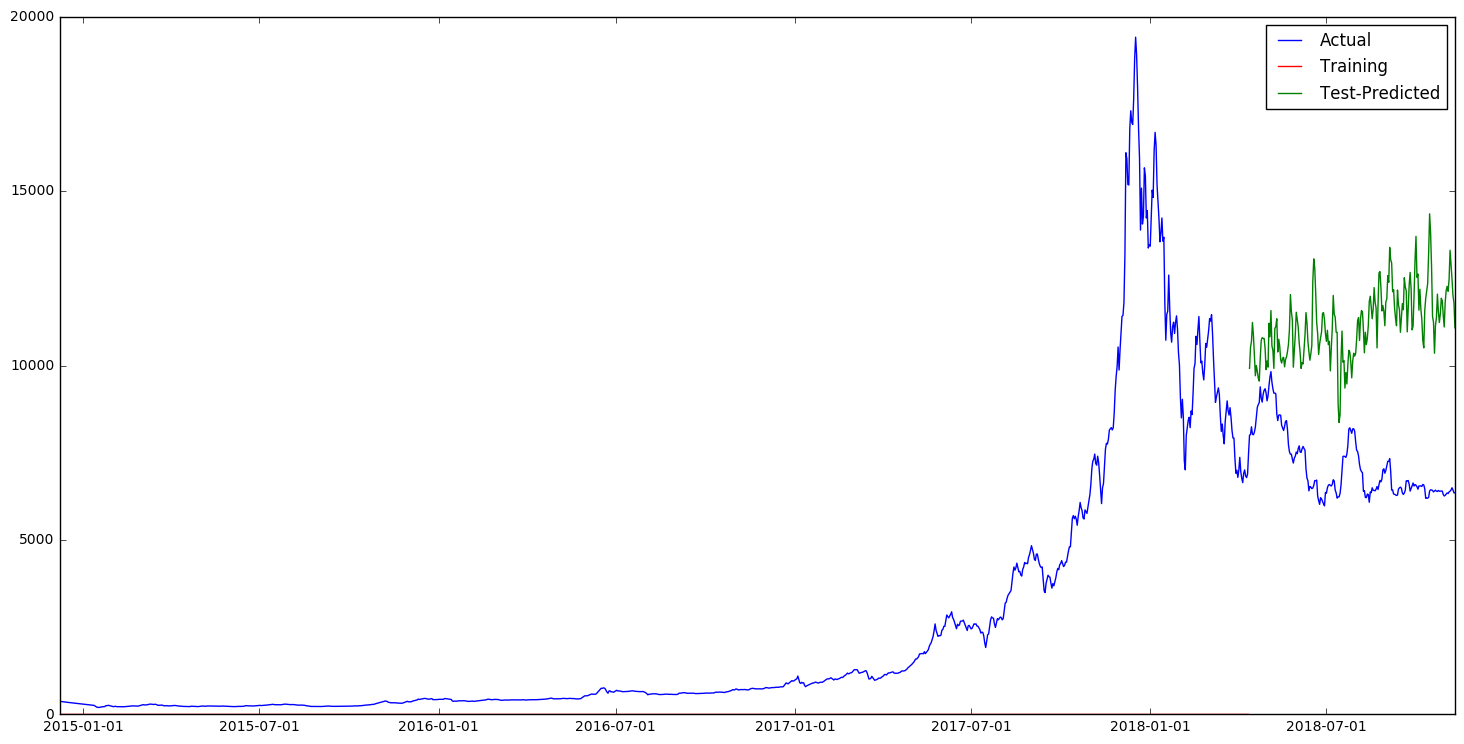

In [343]:
#preproces date col
dates_list_actual = list(price_tweet_df['date'])
dates_list_formatted_actual = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_actual]

dates_list_training = list(price_tweet_df_training['date'])
dates_list_formatted_training = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_training]

dates_list_test = list(price_tweet_df_test['date'].tail(212))
dates_list_formatted_test = [datetime.datetime.strptime(d,'%Y-%m-%d').date() for d in dates_list_test]

# price visualization
plt.figure(figsize = (18,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(dates_list_formatted_actual, price_tweet_df['Close'], color='b', label='Actual')
plt.plot(dates_list_formatted_training, predictions, color='red', label='Training')
plt.plot(dates_list_formatted_test, test_predictions, color='green', label='Test-Predicted')
plt.legend()

## Evaluate Trading Strategy profitability

In [ ]:
#  portfoilio starting amount $10,000 usd
start_amount = 10000

In [344]:
price_tweet_df.describe()

,index,Close,1day_price_change,regime,log_close,sentiment,pos_sentiment_tweet,neg_sentiment_tweet,neutral_sentiment_tweet,pos-neg,neg-plus-neutral,pos-neg-plusNeutral,signal
count,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0,1012.0
mean,819.1,4009.0,5.4,0.1,7.5,282.8,403.2,120.4,703.1,282.8,823.5,-420.3,-0.9
std,394.3,4106.9,268.3,1.0,1.4,302.3,431.6,136.4,748.4,302.3,880.5,460.0,0.4
min,4.0,199.8,-2067.0,-1.0,5.3,3.0,14.0,0.0,18.0,3.0,21.0,-1288.0,-1.0
25%,512.0,516.5,-14.9,-1.0,6.2,34.0,43.0,8.0,70.0,34.0,78.0,-933.2,-1.0
50%,884.0,2342.8,0.8,1.0,7.8,70.0,87.5,24.0,168.0,70.0,191.0,-106.5,-1.0
75%,1154.2,6705.8,28.3,1.0,8.8,610.5,908.2,264.2,1606.0,610.5,1904.2,-34.8,-1.0
max,1407.0,19419.9,2926.3,1.0,9.9,977.0,1220.0,492.0,1856.0,977.0,2100.0,35.0,1.0


In [ ]:
# Create a df with trades
# https://ntguardian.wordpress.com/2016/09/26/introduction-stock-market-data-python-2/
bitcoin_signals = pd.concat([
        pd.DataFrame({"Price": price_tweet_df.loc[price_tweet_df["signal"] == 1, ]} )
    ]
)

In [282]:
#Sources:
# https://scholar.smu.edu/cgi/viewcontent.cgi?article=1039&context=datasciencereview
# https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/

In [ ]:
# https://colab.research.google.com/notebooks/mlcc/first_steps_with_tensor_flow.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=firststeps-colab&hl=en#scrollTo=pDIxp6vcU809
# https://developers.google.com/machine-learning/crash-course/validation/programming-exercise
# https://colab.research.google.com/notebooks/mlcc/validation.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation-colab&hl=en#scrollTo=yTghc_5HkJDW